Installation
------------
To install Nimbus, clone the git repository and install it:

In [ ]:
git clone https://github.com/Kiefersv/Nimbus.git
cd Nimbus
pip install -e .

Quick Start
-----------
To create a Nimbus cloud profile, you will need to provide a temperature, pressure, and K$_\mathrm{zz}$ profile in addition to the gravity and mean molecular weight. For the cloud structure, you need to define the mass mixing ratio from which the cloud is replenished (here called the deep MMR) and a guess on the particle size, given through f$_\mathrm{sed}$  (usually 1 is a good guess).

In [1]:
# import nimbus
import numpy as np
from nimbus import Nimbus

# define temperature [K] and pressure [dyn/cm2] structure
temperature = np.asarray([554, 572, 607, 653, 775, 951, 1073, 1111, 1540, 2654, 3000])
pressure = np.asarray([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4])*1e6

# set up Nimbus object
obj = Nimbus()
obj.set_up_atmosphere(
    temperature = temperature,
    pressure = pressure,
    kzz = np.ones_like(pressure) * 1e9,
    mmw = 2.34,
    gravity = 10**2.49,
    fsed = 1,
    specie = 'SiO',
    deep_mmr = 10**-3,
)
obj.set_up_solver()

# compute the cloud structure
ds = obj.compute()

                   Welcome to Nimbus                       
[INFO] For questions contact: kiefersv.mail@gmail.com
[INFO] Settings selected:
       -> working directory: .
       -> verbose: False
       -> analytic plots: False
[INFO] Atmosphere set up with:
       -> pressure range: 1.00e+04 - 1.00e-06 bar
       -> temperature range: 3.00e+03 - 5.54e+02 K
       -> Kzz range: 1.00e+09 - 1.00e+09 cm2/s
       -> Mean molecular weight: 2.34e+00 amu
       -> Gravity: 3.09e+02 cm/s2
       -> SiO deep MMR: 1.00e-03 g/g
[INFO] Solver set up.
[INFO] Computation started ...[INFO] Max itterations set to 50
[INFO] Cloud structures completed in 6.90s (18 iterations).
[INFO] Saved run under tag: last_run


The resulting ds is an xarray dataset containing the cloud structure. It can be plotted like this:

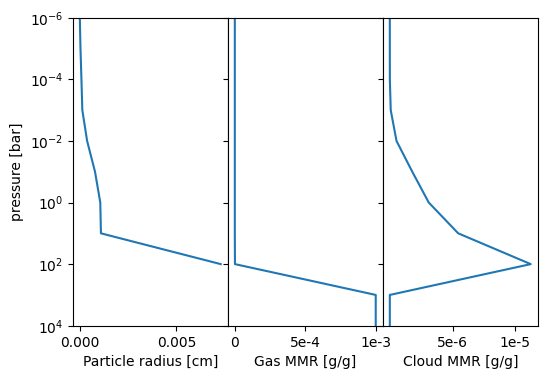

In [2]:
import matplotlib.pyplot as plt

# plot results
fig, ax = plt.subplots(1, 3, figsize=(6,4))
ax[2].semilogy(ds['qc'], ds['pressure'])
ax[1].semilogy(ds['qv'], ds['pressure'])
ax[0].semilogy(ds['rg'][:-2], ds['pressure'][:-2])

# make a pretty plot
for axi in ax:
    axi.set_ylim(bottom=ds['pressure'][-1], top=ds['pressure'][0])
plt.subplots_adjust(wspace=0)
ax[0].set_ylabel('pressure [bar]')
ax[2].set_xlabel('Cloud MMR [g/g]')
ax[1].set_xlabel('Gas MMR [g/g]')
ax[0].set_xlabel('Particle radius [cm]')
ax[2].get_xaxis().set_ticks([5e-6, 1e-5])
ax[2].get_xaxis().set_ticklabels(['5e-6', '1e-5'])
ax[1].get_yaxis().set_ticklabels([])
ax[1].get_xaxis().set_ticks([0, 5e-4, 1e-3])
ax[1].get_xaxis().set_ticklabels(['0', '5e-4', '1e-3'])
ax[2].get_yaxis().set_ticklabels([])
plt.show()